In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

In [4]:
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [31]:
goal_scorers = pd.read_excel('https://query.data.world/s/bcqfgwhbq7pr7e2tjkav6oan2rj7dz?dws=00000',sheet_name=0)
most_appearances = pd.read_excel('https://query.data.world/s/bcqfgwhbq7pr7e2tjkav6oan2rj7dz?dws=00000',sheet_name=1)
youngest_players = pd.read_excel('https://query.data.world/s/bcqfgwhbq7pr7e2tjkav6oan2rj7dz?dws=00000',sheet_name=2)
fastest_goals= pd.read_excel('https://query.data.world/s/bcqfgwhbq7pr7e2tjkav6oan2rj7dz?dws=00000',sheet_name=3)
most_titles = pd.read_excel('https://query.data.world/s/bcqfgwhbq7pr7e2tjkav6oan2rj7dz?dws=00000',sheet_name=4)

In [35]:
goal_scorers.head()

,Player,Goals
0,Cristiano Ronaldo,14
1,Michel Platini,9
2,Antoine Griezmann,7
3,Alan Shearer,7
4,Álvaro Morata,7


In [36]:
goal_scorers.describe(),goal_scorers.info

(           Goals
 count  12.000000
 mean    7.166667
 std     2.329000
 min     6.000000
 25%     6.000000
 50%     6.000000
 75%     7.000000
 max    14.000000,
 <bound method DataFrame.info of                  Player  Goals
 0     Cristiano Ronaldo     14
 1        Michel Platini      9
 2     Antoine Griezmann      7
 3          Alan Shearer      7
 4         Álvaro Morata      7
 5         Thierry Henry      6
 6    Zlatan Ibrahimović      6
 7      Patrick Kluivert      6
 8         Romelu Lukaku      6
 9            Nuno Gomes      6
 10         Wayne Rooney      6
 11  Ruud van Nistelrooy      6>)

In [37]:
goal_scorers.isnull().sum()

Player    0
Goals     0
dtype: int64

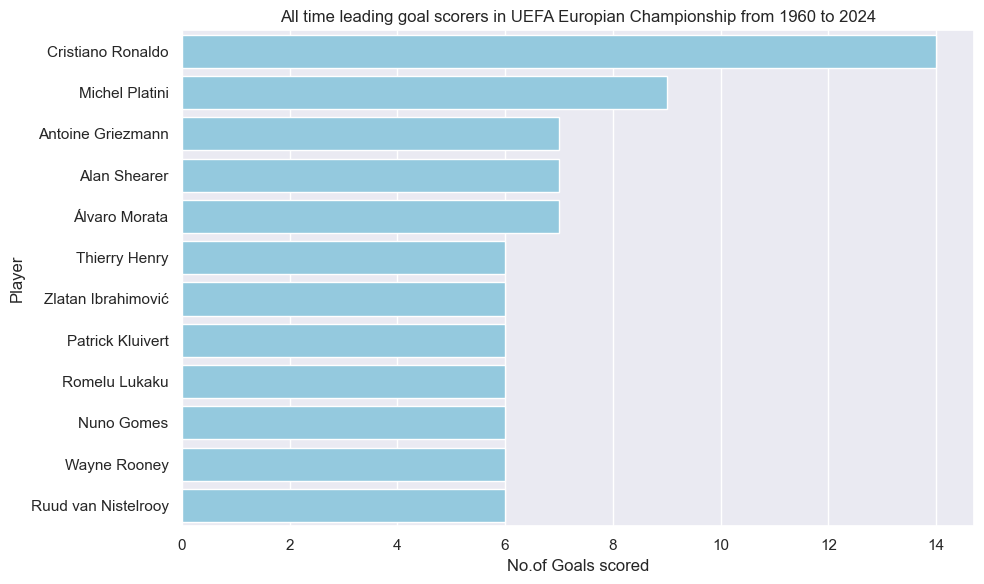

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='Goals',y='Player',data=goal_scorers,color='skyblue')
plt.xlabel('No.of Goals scored')
plt.title('All time leading goal scorers in UEFA Europian Championship from 1960 to 2024')
plt.tight_layout() #enusres everything fits in the figure
plt.savefig('leading_goals.png')
plt.show()

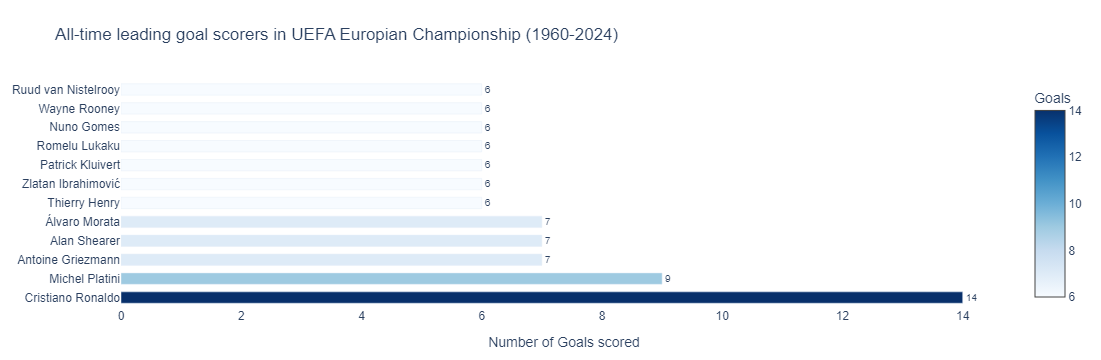

In [69]:
# creating a plotly bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    y = goal_scorers['Player'],
    x = goal_scorers['Goals'],
    text = goal_scorers['Goals'],
    textposition='outside',
    orientation='h',
    marker=dict(
        color = goal_scorers['Goals'],
        colorscale='Blues',
        colorbar=dict(title='Goals')
    ),
    width=0.6
))

# updating layout
fig.update_layout(
    title='All-time leading goal scorers in UEFA Europian Championship (1960-2024)',
    xaxis_title = 'Number of Goals scored',
    font = dict(family='Arial',size=12),
    plot_bgcolor = 'white',
    margin = dict(l=120,r=20,t=80,b=20),
    showlegend = False,
    coloraxis_colorbar = dict(
        title = 'Goals',
        thickness = 25,
        tickvals = [0,25,50,75,100], #customize color bar ticks
        ticktext=['0', '25', '50', '75', '100+']
    )
)

fig.show()

In [56]:
most_appearances.head()

,Player,Country,Appearances
0,Cristiano Ronaldo,Portugal,26
1,Pepe,Portugal,20
2,João Moutinho,Portugal,19
3,Leonardo Bonucci,Italy,18
4,Bastian Schweinsteiger,Germany,18


In [57]:
most_appearances.isnull().sum()

Player         0
Country        0
Appearances    0
dtype: int64

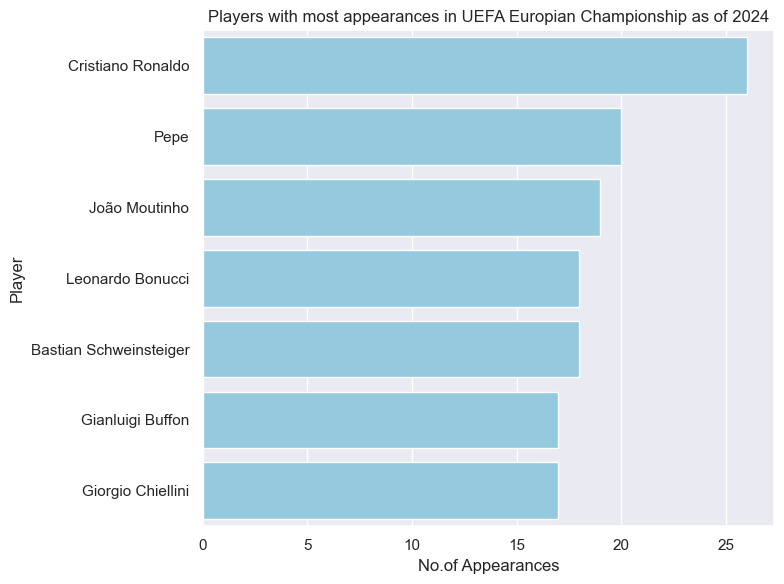

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x='Appearances',y='Player',data=most_appearances,color='skyblue')
plt.xlabel('No.of Appearances')
plt.title('Players with most appearances in UEFA Europian Championship as of 2024')
plt.tight_layout() #enusres everything fits in the figure
#plt.savefig('most_appearances.png')
plt.show()

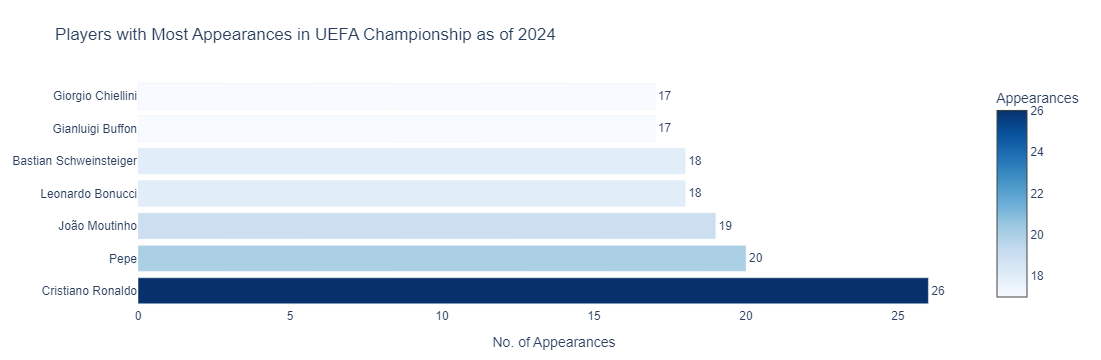

In [73]:
# Create a Plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=most_appearances['Player'],
    x=most_appearances['Appearances'],
    text=most_appearances['Appearances'],
    textposition='outside',
    orientation='h',
    marker=dict(
        color= most_appearances['Appearances'], #color by number of appearances
        colorscale = 'Blues',
        colorbar = dict(title='Appearances')
    )
))

# Update layout
fig.update_layout(
    title='Players with Most Appearances in UEFA Championship as of 2024',
    xaxis_title='No. of Appearances',
    font=dict(family='Arial', size=12),
    plot_bgcolor='white',
    margin=dict(l=100, r=20, t=80, b=20),
    showlegend=False,
    coloraxis_colorbar = dict(
        title = 'Appearances',
        thickness = 25,
        tickvals = [0,25,50,75,100],
        ticktext = ['0','25','50','75','100+']
    )
)

# Show plot
fig.show()

In [63]:
youngest_players.head()

,Player,Country,Tournament,Age at first game
0,Lamine Yamal,Spain,EURO 2024,"16 years, 338 days"
1,Kacper Kozłowski,Poland,EURO 2020,"17 years, 246 days"
2,Jude Bellingham,England,EURO 2020,"17 years, 349 days"
3,Jetro Willems,Netherlands,EURO 2012,"18 years, 71 days"
4,Enzo Scifo,Belgium,EURO 1984,"18 years, 115 days"


In [74]:
youngest_players.isnull().sum()

Player               0
Country              0
Tournament           0
Age at first game    0
dtype: int64

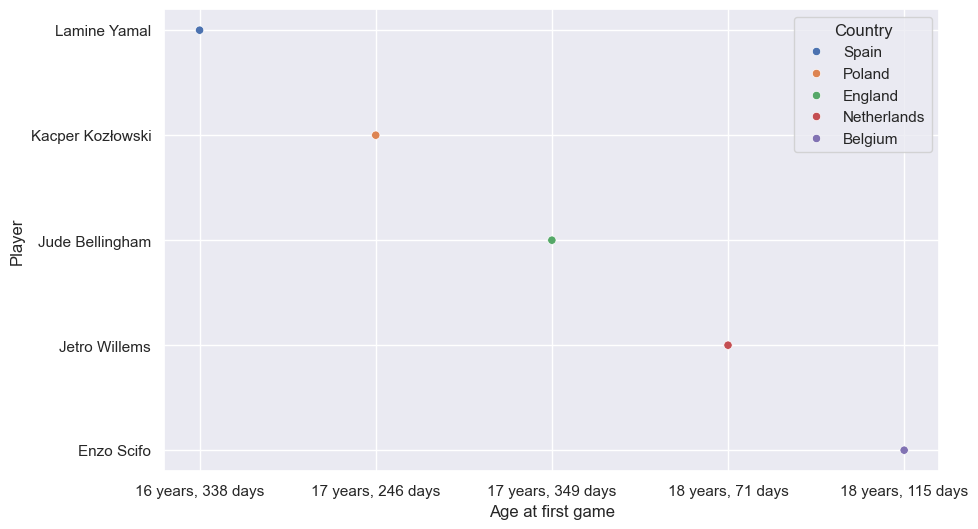

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age at first game',y='Player',data=youngest_players,hue='Country')
plt.show()

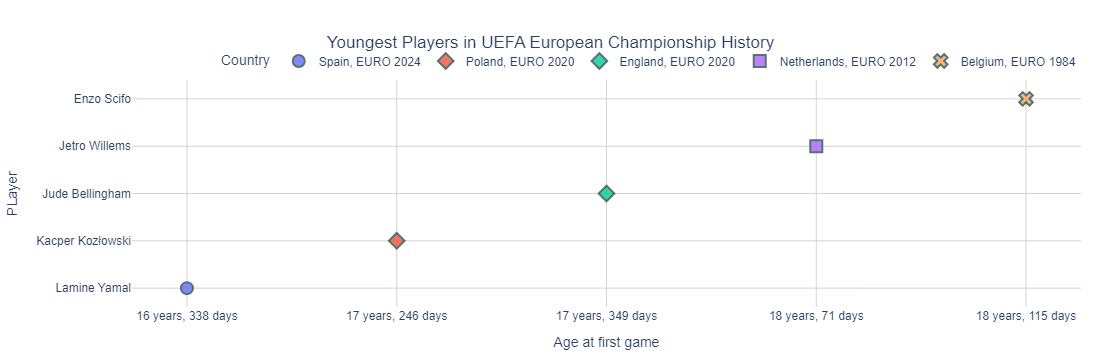

In [113]:
# create a scatter plot using plotly
fig = px.scatter(
    youngest_players,
    x='Age at first game',
    y='Player',
    color='Country',
    symbol='Tournament',
    title='Youngest players in UEFA Europian Championship History',
    labels={'Age at first game': 'Age at First Game', 'Player': 'Player'},
)
# Add hover information
fig.update_traces(
    marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')),
    hovertemplate='<b>%{y}</b><br>Country: %{marker.color}<br>Age: %{x}<br>Tournament: %{marker.symbol}<extra></extra>'
)
# update layout
fig.update_layout(
    title={
        'text': 'Youngest Players in UEFA European Championship History',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Age at first game',
    yaxis_title='PLayer',
    font=dict(family='Arial',size=12),
    plot_bgcolor='white',
    margin=dict(l=100,r=20,t=80,b=20),
    legend=dict(
        title='Country',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
    xaxis=dict(
        showgrid=True,
        gridcolor='LightGray',
        zeroline=True,
        zerolinecolor='LightGray'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='LightGray'
    )
)
# show plot
fig.show()

In [85]:
fastest_goals.head

,Player,Country,Opponent,Tournament,Goal Time
0,Nedim Bajrami,Albania,Italy,EURO 2024,23 seconds
1,Dmitri Kirichenko,Russia,Greece,EURO 2004,1 minute 7 seconds
2,Emil Forsberg,Sweden,Poland,EURO 2020,1 minute 22 seconds
3,Yussuf Poulsen,Denmark,Belgium,EURO 2020,1 minute 39 seconds
4,Robert Lewandowski,Poland,Portugal,EURO 2016,1 minute 40 seconds


In [86]:
fastest_goals.isnull().sum()

Player        0
Country       0
Opponent      0
Tournament    0
Goal Time     0
dtype: int64

In [87]:
fastest_goals.info


<bound method DataFrame.info of                Player  Country  Opponent Tournament            Goal Time
0       Nedim Bajrami  Albania     Italy  EURO 2024           23 seconds
1   Dmitri Kirichenko   Russia    Greece  EURO 2004   1 minute 7 seconds
2       Emil Forsberg   Sweden    Poland  EURO 2020  1 minute 22 seconds
3      Yussuf Poulsen  Denmark   Belgium  EURO 2020  1 minute 39 seconds
4  Robert Lewandowski   Poland  Portugal  EURO 2016  1 minute 40 seconds>

In [95]:
# Convert 'Goal Time' to seconds for numerical plotting
def convert_time_to_seconds(time_str):
    parts = time_str.split()
    if 'minute' in parts:
        minutes = int(parts[0])
        seconds = int(parts[2]) if 'seconds' in parts else 0
        total_seconds = minutes * 60 + seconds
    else:
        total_seconds = int(parts[0])
    return total_seconds

fastest_goals['Goal Time (seconds)'] = [convert_time_to_seconds(time) for time in fastest_goals['Goal Time']]

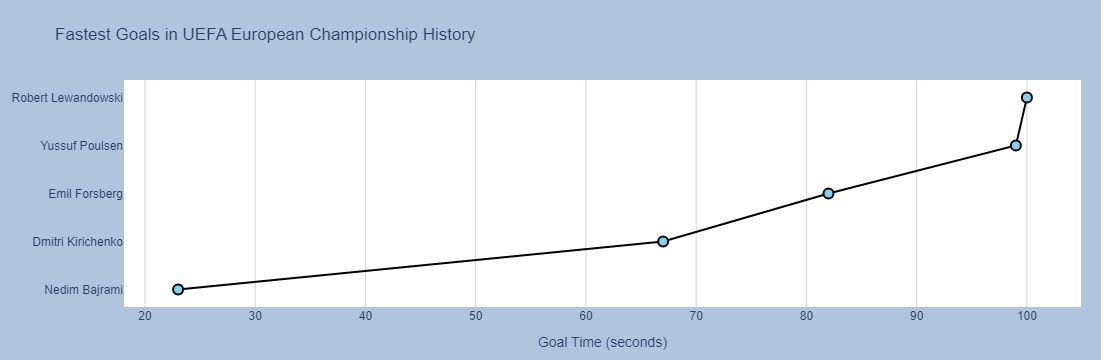

In [98]:
# cresting a lollipop chart using plotly
fig =go.Figure()

# adding sticks (lines)
fig.add_trace(go.Scatter(
    x = fastest_goals['Goal Time (seconds)'],
    y = fastest_goals['Player'],
    mode = 'lines+markers',
    marker = dict(size=10,color='skyblue',line=dict(width=2,color='black')),
    line = dict(color='black',width=2),
    text = fastest_goals['Goal Time'],
    hovertemplate='<b>%{y}</b><br>Country: %{marker.color}<br>Goal Time: %{x} seconds<br>Tournament: %{text}<extra></extra>',
    showlegend=False
))
 # adding layout details
fig.update_layout(
    title = 'Fastest Goals in UEFA European Championship History',
    xaxis_title = 'Goal Time (seconds)',
    font = dict(family='Arial', size=12),
    plot_bgcolor = 'white',
    paper_bgcolor = 'LightSteelBlue',
    margin = dict(l=100, r=20, t=80, b=20),
    xaxis = dict(
        showgrid = True,
        gridcolor = 'LightGray',
        zeroline = True,
        zerolinecolor = 'LightGray'
    ),
    yaxis=dict(
        showgrid = False
    )
)
fig.show()

In [101]:
most_titles.head()

,Player,Country,Titles
0,Rainer Bonhof,West Germany,2
1,Xabi Alonso,Spain,2
2,Iker Casillas,Spain,2
3,Cesc Fàbregas,Spain,2
4,Andrés Iniesta,Spain,2


In [102]:
most_titles.isnull().sum()

Player     0
Country    0
Titles     0
dtype: int64

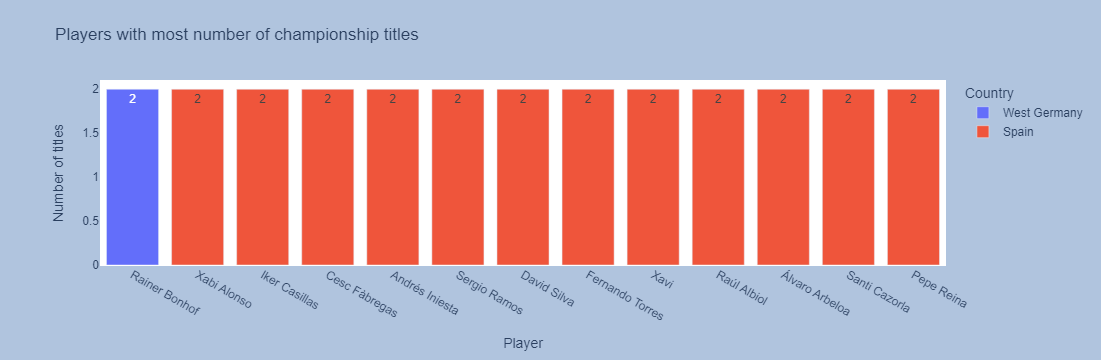

In [109]:
# creating bar chart using plotly express
fig = px.bar(
    most_titles,
    x = 'Player',
    y = 'Titles',
    color = 'Country',
    title = 'Players with most number of championship titles',
    labels = {'Title':'Number of  titles'},
    text = 'Titles'
)
# add layout
fig.update_layout(
    yaxis_title = 'Number of titles',
    font = dict(family = 'Arial',size=12),
    plot_bgcolor = 'white',
    paper_bgcolor = 'LightSteelBlue',
    margin = dict(dict(l=100,r=20,t=80,b=20))
)
# show plot
fig.show()